### -- EDA Case Study --

### - Understanding The Data

In [1]:
# Importing the libraries required for analysis.

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading in the 'application data' csv.

app_data = pd.read_csv('application_data.csv')

# Setting max view options

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Checking if the data has been read in correctly

app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [3]:
# Checking the shape of the data

app_data.shape

(307511, 122)

In [4]:
# Using the 'columns_descriptions.csv' we've understood that Target Variable = 1 are the defaulters and Target Variable = 0 are the non-defaulters

### - Data Cleaning

In [5]:
# Displaying all the column headers.

app_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
# Removing unwanted columns. Columns have been selected based on the research done on risk analytics and the understanding based of the 'columns_descriptions.csv' file.

app_data.drop(['NAME_TYPE_SUITE','CNT_FAM_MEMBERS',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT'], axis = 1, inplace = True) 

In [7]:
# Checking to see if the columns retained are correct.

app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,Business Entity Type 3,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,Government,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,Religion,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,Laborers,Other,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,Accountants,Business Entity Type 3,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,Managers,Other,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,NaN,XNA,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,Laborers,Electricity,NaN


In [8]:
app_data.shape

(307511, 21)

In [9]:
# Checking for data-type across the selected columns.

app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

In [10]:
# Checking for null values.

app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
OCCUPATION_TYPE               96391
ORGANIZATION_TYPE                 0
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [11]:
# Imputing missing values in the OCCUPATION_TYPE column. Going the application_data.csv file it was noticed that a large number of rows in the OCCUPATION_TYPE column had NaN values.
# Checking in Excel we were able to determine that in reference to those rows that contained 'Pensioner' in the NAME_INCOME_TYPE column had NaN values in the OCCUPATION_TYPE column.
# We were able to correct these values by creating a filter for the rows containing the 'Pensioner' value and replacing the NaN values in the OCCUPATION_TYPE column with 'Retiree'.
# This was done to help increase the accuracy of the column (which contains categorical variables). This will help later on the analysis stage.

filt = app_data['NAME_INCOME_TYPE'] == 'Pensioner'

app_data.loc[filt,'OCCUPATION_TYPE'] = app_data.loc[filt,'OCCUPATION_TYPE'].fillna('Retiree')

In [12]:
# Replacing all the remaining NaN values in the OCCUPATION_TYPE column with 'Unknown'.

app_data['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)

In [13]:
# Taking care of the '365243' values by replacing them with 0. As all of these rows belong to 'Retirees' and nobody can live for a 1000 years.

filt_date = app_data['DAYS_EMPLOYED'] >= 365243
app_data.loc[filt_date, 'DAYS_EMPLOYED'] = app_data.loc[filt_date, 'DAYS_EMPLOYED'].replace(to_replace = 365243,  value = 0)

In [14]:
# Checking the number of XNA values in the ORGANIZATION_TYPE column

app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [15]:
# Taking care of the 'XNA' values and replacing with 'None'. The 'XNA' values belong to 'Retirees'. As they have retired and are no longer part of any organisation.

filt_org = app_data['ORGANIZATION_TYPE'] == 'XNA'
app_data.loc[filt_org,'ORGANIZATION_TYPE'] = app_data.loc[filt_org,'ORGANIZATION_TYPE'].replace(to_replace = 'XNA',  value = 'None')

In [16]:
# Checking to see the average, median, min and max values of the column 'AMT_REQ_CREDIT_BUREAU_YEAR'.

app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [17]:
# Replacing NaN values with the median of the column. We're replacing with the median since we have some outliers present in the column as well.

fillval = app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(fillval, inplace = True)

In [18]:
# Have identified the NaN values from the column, AMT_ANNUITY. As the missing values are only 12 out of 307511 or less than 0.01%. We will not be dropping the rows as most of the information is present in the rows.
# If we did want to drop the rows, we would use the below code to achieve that.
# app_data.dropna(axis=0, how ='any', inplace = True)

In [19]:
# Replacing the 4 'XNA' values as 'F' since the F values are lesser. This won't have a significant impact on the data.

app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [20]:
# Doing a final check for null values. We see that only the NaN values in the AMT_ANNUITY column are present.

app_data.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
AMT_GOODS_PRICE               278
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
OCCUPATION_TYPE                 0
ORGANIZATION_TYPE               0
AMT_REQ_CREDIT_BUREAU_YEAR      0
dtype: int64

In [21]:
# Formating the 'DAYS_BIRTH' column by making the values postive and converting into years.
# Renaming the column 'YEARS_BIRTH'

app_data['YEARS_BIRTH'] = ((app_data['DAYS_BIRTH'].abs())/365).astype(int)

In [22]:
# Binning the AMT_INCOME_TOTAL column

app_data['Income_Category'] = pd.cut(app_data['AMT_INCOME_TOTAL'], [25000, 50000, 100000, 200000, 500000, 1000000, 1200000], labels = ['Very Low', 'Low', 'Below Average', 'Average', 'Above Average', 'High'])

In [23]:
# Binning the REGION_POPULATION_RELATIVE column

app_data['Population_Density'] = pd.cut(app_data['REGION_POPULATION_RELATIVE'], [0.00, 0.02, 0.04, 0.05, 0.07], labels = ['Very Low Density', 'Low Density', 'Average Density', 'High Density'])

In [24]:
# Re-arranging the columns

cols = app_data.columns.tolist()
cols = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'Income_Category', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'Population_Density', 'YEARS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_YEAR']
app_data = app_data[cols]

In [25]:
# Checking to see if the columns have been rearranged properly

app_data.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,Income_Category,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,Population_Density,YEARS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,1,M,N,Y,0,202500.0,Average,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,Very Low Density,25,-637,Laborers,Business Entity Type 3,1.0
1,100003,Cash loans,0,F,N,N,0,270000.0,Average,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,Very Low Density,45,-1188,Core staff,School,0.0
2,100004,Revolving loans,0,M,Y,Y,0,67500.0,Low,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Very Low Density,52,-225,Laborers,Government,0.0
3,100006,Cash loans,0,F,N,Y,0,135000.0,Below Average,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,Very Low Density,52,-3039,Laborers,Business Entity Type 3,1.0
4,100007,Cash loans,0,M,N,Y,0,121500.0,Below Average,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,Low Density,54,-3038,Core staff,Religion,0.0
5,100008,Cash loans,0,M,N,Y,0,99000.0,Low,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,Low Density,46,-1588,Laborers,Other,1.0
6,100009,Cash loans,0,F,Y,Y,1,171000.0,Below Average,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,0.035792,Low Density,37,-3130,Accountants,Business Entity Type 3,2.0
7,100010,Cash loans,0,M,Y,Y,0,360000.0,Average,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,0.003122,Very Low Density,51,-449,Managers,Other,0.0
8,100011,Cash loans,0,F,N,Y,0,112500.0,Below Average,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,Very Low Density,55,0,Retiree,None,1.0
9,100012,Revolving loans,0,M,N,Y,0,135000.0,Below Average,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,Very Low Density,39,-2019,Laborers,Electricity,1.0


In [26]:
app_data.shape

(307511, 23)

### - Handling Outliers

In [27]:
# Checking for outliers in the 'AMT_INCOME_TOTAL' column and setting the display options to show uptil one decimal point.

app_data['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count       307511.000000
mean        168797.919297
std         237123.146279
min          25650.000000
25%         112500.000000
50%         147150.000000
75%         202500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object

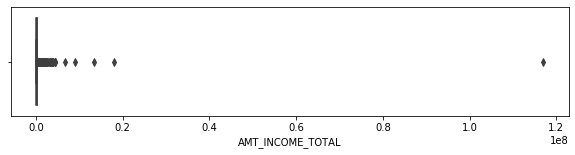

In [28]:
# Plotting a boxplot to check for outliers

plt.figure(figsize = (10,2))

sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

In [29]:
# Since the above plot isn't very clear we'll take a look at the quantiles to gain a better understanding

app_data['AMT_INCOME_TOTAL'].quantile([0.5,0.75,0.9,0.95,0.99])

0.50    147150.0
0.75    202500.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [30]:
# Checking for all values in the AMT_INCOME_TOTAL column that are greater the 5,00,000. 
# As we can see these individual have a good income and have been employed for a long time before applying for a loan. 
# Hence we can say that this data is valid and should not be removed. Although when doing the analysis we must keep these values in mind and take steps accordingly.

app_data[app_data['AMT_INCOME_TOTAL'] > 500000].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR
count,2702.000000,2702.000000,2702.000000,2.702000e+03,2.702000e+03,2702.000000,2.700000e+03,2702.000000,2702.000000,2702.000000,2702.000000
mean,278004.962620,0.054034,0.504811,7.855369e+05,1.123809e+06,51468.400259,1.044190e+06,0.032991,42.578090,-2437.135825,1.522946
std,102996.463037,0.226127,0.789002,2.307671e+06,5.947497e+05,29491.348859,5.639815e+05,0.023081,9.545639,2230.389461,1.677218
min,100059.000000,0.000000,0.000000,5.040000e+05,4.500000e+04,5598.000000,4.500000e+04,0.001276,21.000000,-13804.000000,0.000000
25%,190164.250000,0.000000,0.000000,5.400000e+05,6.750000e+05,33923.250000,6.750000e+05,0.011703,35.000000,-3370.500000,0.000000
50%,276384.500000,0.000000,0.000000,6.750000e+05,1.024740e+06,45954.000000,9.000000e+05,0.028663,42.000000,-1822.500000,1.000000
75%,368994.000000,0.000000,1.000000,7.200000e+05,1.354500e+06,62568.000000,1.350000e+06,0.046220,50.000000,-813.500000,2.000000
max,456236.000000,1.000000,5.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,68.000000,0.000000,9.000000


In [31]:
# Checking for outliers in the 'AMT_INCOME_TOTAL' column and setting the display options to show decimal point.

app_data['AMT_CREDIT'].describe().apply(lambda x: format(x, 'f'))

count     307511.000000
mean      599025.999706
std       402490.776996
min        45000.000000
25%       270000.000000
50%       513531.000000
75%       808650.000000
max      4050000.000000
Name: AMT_CREDIT, dtype: object

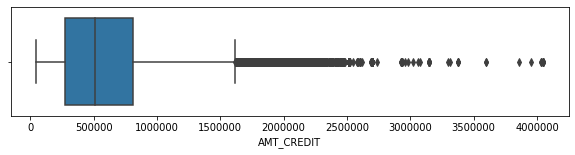

In [32]:
# Checking for outliers in the 'AMT_CREDIT' column and setting the display options to show decimal point.

plt.figure(figsize = (10,2))

sns.boxplot(app_data['AMT_CREDIT'])
plt.show()

In [33]:
# All the values are countinous and there doesn't seem to be any outliers that need to be removed.

app_data['AMT_CREDIT'].quantile([0.5,0.75,0.9,0.95,0.99])

0.50     513531.0
0.75     808650.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [34]:
# Checking for outliers in the 'REGION_POPULATION_RELATIVE' column and setting the display options to show uptil one decimal point.

app_data['REGION_POPULATION_RELATIVE'].describe().apply(lambda x: format(x, 'f'))

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: object

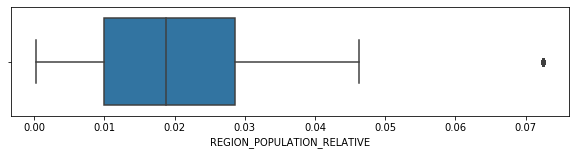

In [35]:
# As we can see very clearly there is an outlier present in this column

plt.figure(figsize = (10,2))

sns.boxplot(app_data['REGION_POPULATION_RELATIVE'])
plt.show()

In [36]:
# The outlier values seem to be from a region that has a high population density

app_data[app_data['REGION_POPULATION_RELATIVE'] > 0.07].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR
count,8412.000000,8412.000000,8412.000000,8.412000e+03,8.412000e+03,8411.000000,8.408000e+03,8.412000e+03,8412.000000,8412.000000,8412.000000
mean,278785.531384,0.039705,0.348431,2.804833e+05,8.278036e+05,37388.844668,7.444556e+05,7.250800e-02,44.463029,-1816.136947,1.713148
std,102571.239377,0.195277,0.659812,1.577046e+05,5.162138e+05,19736.183043,4.717131e+05,6.509069e-15,11.811077,2142.128204,1.790104
min,100077.000000,0.000000,0.000000,4.500000e+04,4.500000e+04,2164.500000,4.500000e+04,7.250800e-02,21.000000,-16365.000000,0.000000
25%,190580.000000,0.000000,0.000000,1.800000e+05,4.500000e+05,23850.000000,4.275000e+05,7.250800e-02,35.000000,-2686.500000,0.000000
50%,278790.000000,0.000000,0.000000,2.475000e+05,7.284600e+05,34551.000000,6.750000e+05,7.250800e-02,44.000000,-1136.000000,1.000000
75%,367471.500000,0.000000,1.000000,3.375000e+05,1.125000e+06,47484.000000,9.495000e+05,7.250800e-02,54.000000,-225.000000,2.000000
max,456242.000000,1.000000,5.000000,2.250000e+06,4.050000e+06,225000.000000,4.050000e+06,7.250800e-02,69.000000,0.000000,23.000000


In [37]:
# Checking for outliers in the 'AMT_REQ_CREDIT_BUREAU_YEAR' column and setting the display options to show uptil one decimal point.

app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe().apply(lambda x: format(x, 'f'))

count    307511.000000
mean          1.778463
std           1.765523
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: object

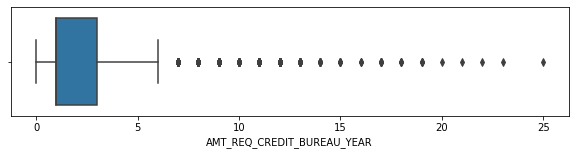

In [38]:
plt.figure(figsize = (10,2))

sns.boxplot(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

In [39]:
# Special attention should be given to individuals about whom the bank has made more than 6 enquiries in an year. 
# Based on the research done on Risk Analytics, banks consider a greater number of enquiries to be a negative sign.

app_data[app_data['AMT_REQ_CREDIT_BUREAU_YEAR'] > 6].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR
count,7233.000000,7233.000000,7233.000000,7.233000e+03,7.233000e+03,7232.000000,7.229000e+03,7233.000000,7233.000000,7233.000000,7233.000000
mean,278657.733167,0.092769,0.321582,1.788283e+05,5.578542e+05,26622.125069,5.009205e+05,0.021052,46.522328,-1793.757639,7.712844
std,103361.720787,0.290129,0.660810,8.445343e+04,3.617541e+05,13816.485109,3.325649e+05,0.013539,12.249123,2220.518297,1.116213
min,100077.000000,0.000000,0.000000,3.150000e+04,4.500000e+04,2295.000000,4.500000e+04,0.001276,21.000000,-16365.000000,7.000000
25%,187811.000000,0.000000,0.000000,1.170000e+05,2.700000e+05,16585.875000,2.295000e+05,0.010147,37.000000,-2592.000000,7.000000
50%,279505.000000,0.000000,0.000000,1.575000e+05,4.905000e+05,24543.000000,4.500000e+05,0.018850,47.000000,-1113.000000,7.000000
75%,369892.000000,0.000000,0.000000,2.250000e+05,7.551900e+05,33832.125000,6.750000e+05,0.028663,57.000000,0.000000,8.000000
max,456237.000000,1.000000,5.000000,1.350000e+06,2.404386e+06,136687.500000,2.250000e+06,0.072508,68.000000,0.000000,25.000000


### - Data Analysis

In [40]:
# Checking for data imbalance. Remember 1 = Defaulter and 0 = Non-Defaulter
# As we can see the data isn't 50/50. So there by we can conclude that this is a imbalanced dataset

app_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [41]:
# Splitting the dataframe into two based on the 'target' column variable 0 and 1

filt_zero = app_data['TARGET'] == 0

data_zero = app_data.loc[filt_zero]

filt_one = app_data['TARGET'] == 1

data_one = app_data.loc[filt_one]

In [42]:
data_zero.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,Income_Category,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,Population_Density,YEARS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,Cash loans,0,F,N,N,0,270000.0,Average,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,Very Low Density,45,-1188,Core staff,School,0.0
2,100004,Revolving loans,0,M,Y,Y,0,67500.0,Low,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Very Low Density,52,-225,Laborers,Government,0.0
3,100006,Cash loans,0,F,N,Y,0,135000.0,Below Average,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,Very Low Density,52,-3039,Laborers,Business Entity Type 3,1.0
4,100007,Cash loans,0,M,N,Y,0,121500.0,Below Average,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,Low Density,54,-3038,Core staff,Religion,0.0
5,100008,Cash loans,0,M,N,Y,0,99000.0,Low,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,Low Density,46,-1588,Laborers,Other,1.0


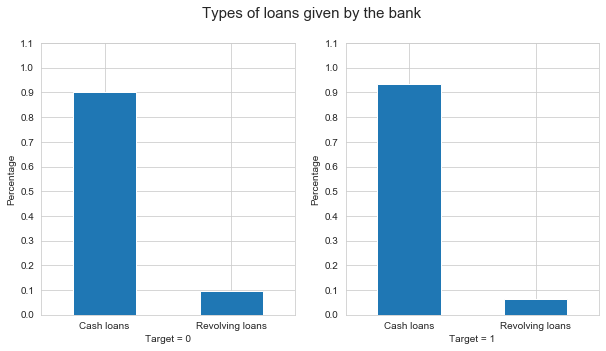

In [43]:
# Univariate Analysis on Categorical Variable Column, 'NAME_CONTRACT_TYPE'.
# As we can see, the bank has given a majority of cash loans to the customers that have not defaulted.
# We can also see that the bank has given slightly more cash loans to the customers that have defaulted.

plt.figure(figsize = (10,5))

sns.set_style("whitegrid")

plt.suptitle('Types of loans given by the bank', fontsize = 15, fontweight = 10)

plt.subplot(1,2,1)
data_zero['NAME_CONTRACT_TYPE'].value_counts(normalize = True).plot.bar()

plt.xlabel('Target = 0')
plt.ylabel('Percentage')

plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1.2, 0.1))

plt.subplot(1,2,2)
data_one['NAME_CONTRACT_TYPE'].value_counts(normalize = True).plot.bar()

plt.xlabel('Target = 1')
plt.ylabel('Percentage')

plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1.2, 0.1))

plt.show()

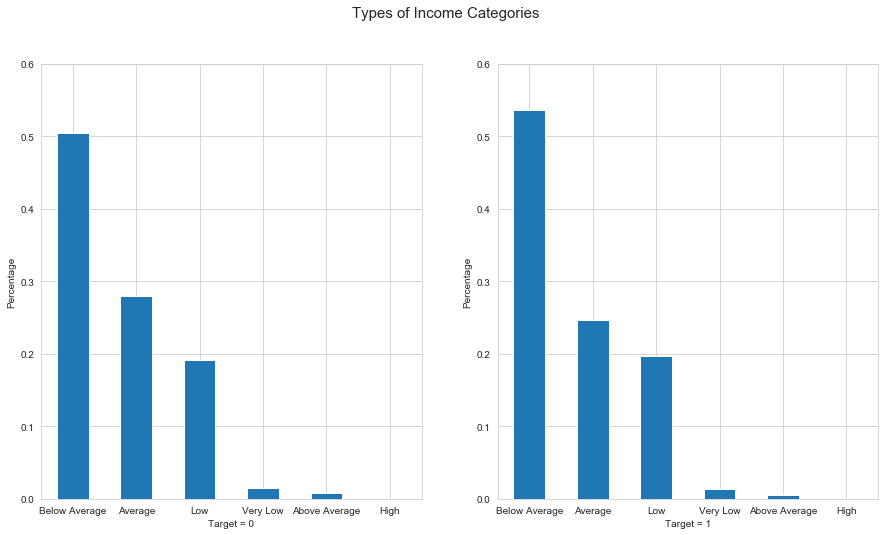

In [44]:
# Univariate Analysis on Categorical Variable Column, 'Income_Category'.
# As seen in the graphs below, people with the lowest incomes were given the most number of loans.

plt.figure(figsize = (15,8))

plt.suptitle('Types of Income Categories', fontsize = 15, fontweight = 10)

plt.subplot(1,2,1)
data_zero['Income_Category'].value_counts(normalize = True).plot.bar()

plt.xlabel('Target = 0')
plt.ylabel('Percentage')

plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 0.7, 0.1))

plt.subplot(1,2,2)
data_one['Income_Category'].value_counts(normalize = True).plot.bar()

plt.xlabel('Target = 1')
plt.ylabel('Percentage')

plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 0.7, 0.1))

plt.show()

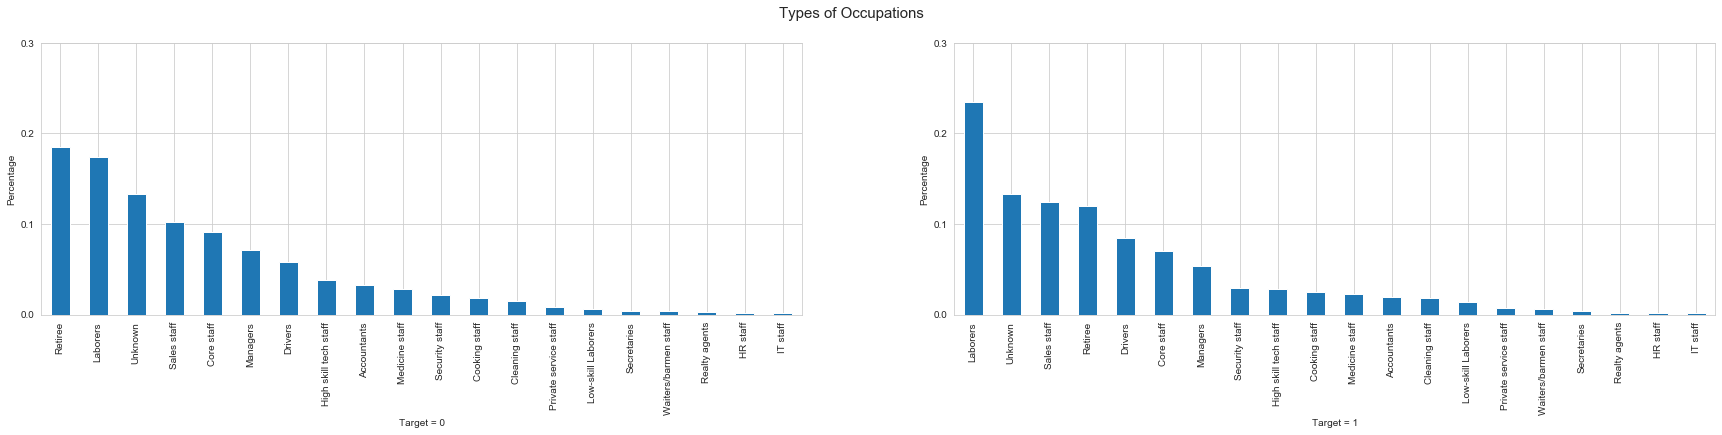

In [45]:
# Univariate Analysis on Categorical Variable Column, 'OCCUPATION_TYPE'.
# Retirees were the top occupation type to get the most number of loans, when looking at target = 0
# Labourers were the top occupation type to get the most number of loans, when looking at target = 1

plt.figure(figsize = (30,5))

plt.suptitle('Types of Occupations', fontsize = 15, fontweight = 10)

plt.subplot(1,2,1)
data_zero['OCCUPATION_TYPE'].value_counts(normalize = True).plot.bar()

plt.xlabel('Target = 0')
plt.ylabel('Percentage')

plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 0.4, 0.1))

plt.subplot(1,2,2)
data_one['OCCUPATION_TYPE'].value_counts(normalize = True).plot.bar()

plt.xlabel('Target = 1')
plt.ylabel('Percentage')

plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 0.4, 0.1))

plt.show()

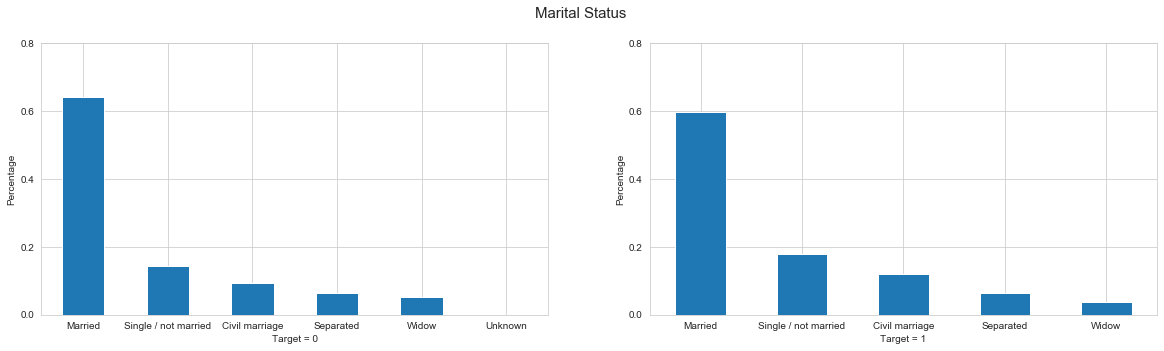

In [46]:
# Univariate Analysis on Categorical Variable Column, 'NAME_FAMILY_STATUS'.
# As seen below the plot indicates that married customers were the preference.

plt.figure(figsize = (20,5))

plt.suptitle('Marital Status', fontsize = 15, fontweight = 10)

plt.subplot(1,2,1)
data_zero['NAME_FAMILY_STATUS'].value_counts(normalize = True).plot.bar()

plt.xlabel('Target = 0')
plt.ylabel('Percentage')

plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1, 0.2))

plt.subplot(1,2,2)
data_one['NAME_FAMILY_STATUS'].value_counts(normalize = True).plot.bar()

plt.xlabel('Target = 1')
plt.ylabel('Percentage')

plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1, 0.2))

plt.show()

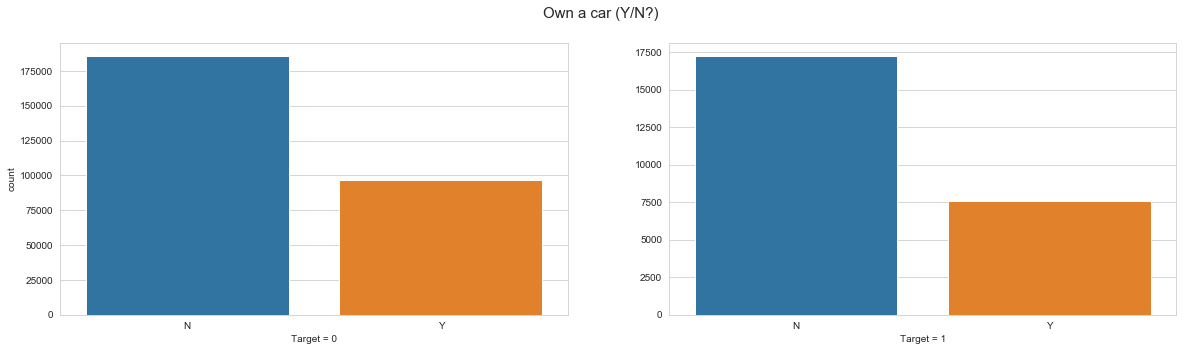

In [47]:
# Plotting for Own Car
# As seen below less than half of all applicants don't own a car. This indicates the availability of less disposible income.

plt.figure(figsize = (20,5))

plt.suptitle('Own a car (Y/N?)', fontsize = 15, fontweight = 20)

plt.subplot(1,2,1)
sns.countplot(data_zero['FLAG_OWN_CAR'])
plt.xlabel("Target = 0")


plt.subplot(1,2,2)
sns.countplot(data_one['FLAG_OWN_CAR'])
plt.xlabel("Target = 1")
plt.ylabel(None)

plt.show()

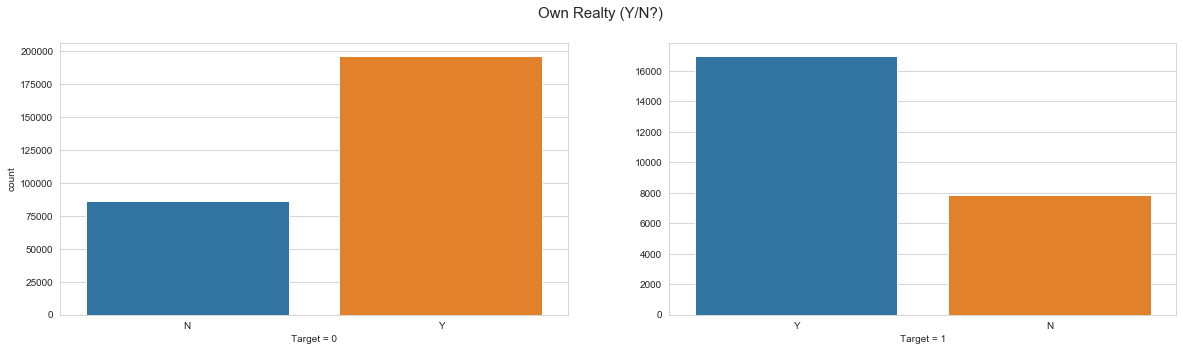

In [48]:
# Plotting for Own Realty
# As seen below more than half of all applicants across both target variables own some form of realty.

plt.figure(figsize = (20,5))

plt.suptitle('Own Realty (Y/N?)', fontsize = 15, fontweight = 20)

plt.subplot(1,2,1)
sns.countplot(data_zero['FLAG_OWN_REALTY'])
plt.xlabel("Target = 0")


plt.subplot(1,2,2)
sns.countplot(data_one['FLAG_OWN_REALTY'])
plt.xlabel("Target = 1")
plt.ylabel(None)

plt.show()

In [50]:
# Numerical variables correlation

data_zero.corr(method ='pearson')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001318,0.000702,0.003852
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336907,-0.043727,-0.035861
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062494,-0.082958,0.034384
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047366,-0.101898,-0.037519
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012254,-0.086600,-0.008009
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044552,-0.102276,-0.039815
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025332,0.004317,0.000152
YEARS_BIRTH,0.001318,NaN,-0.336907,-0.062494,0.047366,-0.012254,0.044552,0.025332,1.000000,0.007306,0.073309
DAYS_EMPLOYED,0.000702,NaN,-0.043727,-0.082958,-0.101898,-0.086600,-0.102276,0.004317,0.007306,1.000000,0.009133


In [51]:
# Checking the correlation of numerical variables for the target variable = 0
# Creating a variable zero_corr to store all the correlations of the numerical variables for the target variable = 0
# Filtering the data to remove all duplicates and where correlation is 1.0

zero_corr = data_zero.corr(method ='pearson')
zero_corr.unstack().reset_index()
zero_corr = zero_corr.where(np.triu(np.ones(zero_corr.shape),k=1).astype(np.bool))

In [52]:
# Renaming columns and dropping NaN values

corr_zero = zero_corr.unstack().reset_index()
corr_zero.columns = ['Var1','Var2','Correlation']
corr_zero.dropna(subset = ['Correlation'], inplace = True)

In [53]:
# Creating a new column, 'Correlation_Abs' which will contain the absolute values of correlation

corr_zero['Correlation_Abs'] = corr_zero['Correlation'].abs()

In [54]:
# Sorting values based on the 'Correlation_Abs' column in descending order

corr_zero.sort_values('Correlation_Abs', ascending = False, inplace = True)

In [55]:
# Checking the top 10 correlations for target variable = 0

corr_zero.head(10)

,Var1,Var2,Correlation,Correlation_Abs
70,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
71,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
59,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
58,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
69,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
90,YEARS_BIRTH,CNT_CHILDREN,-0.336907,0.336907
80,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.167851,0.167851
82,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.120988,0.120988
83,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,0.103827,0.103827


In [56]:
# Checking the correlation of numerical variables for the target variable = 1
# Creating a variable zero_corr to store all the correlations of the numerical variables for the target variable = 1
# Filtering the data to remove all duplicates and where correlation is 1.0

one_corr = data_one.corr(method ='pearson')
one_corr.unstack().reset_index()
one_corr = one_corr.where(np.triu(np.ones(one_corr.shape),k=1).astype(np.bool))

In [57]:
# Renaming columns and dropping NaN values

one_corr = one_corr.unstack().reset_index()
one_corr.columns = ['Var1','Var2','Correlation']
one_corr.dropna(subset = ['Correlation'], inplace = True)

In [58]:
# Creating a new column, 'Correlation_Abs' which will contain the absolute values of correlation

one_corr['Correlation_Abs'] = one_corr['Correlation'].abs()

In [59]:
# Sorting values based on the 'Correlation_Abs' column in descending order

one_corr.sort_values('Correlation_Abs', ascending = False, inplace = True)

In [60]:
# Checking the top 10 correlations for target variable = 1

one_corr.head(10)

,Var1,Var2,Correlation,Correlation_Abs
70,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
71,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
59,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
90,YEARS_BIRTH,CNT_CHILDREN,-0.259222,0.259222
94,YEARS_BIRTH,AMT_GOODS_PRICE,0.135603,0.135603
92,YEARS_BIRTH,AMT_CREDIT,0.135070,0.135070
105,DAYS_EMPLOYED,AMT_GOODS_PRICE,-0.097448,0.097448
103,DAYS_EMPLOYED,AMT_CREDIT,-0.093850,0.093850
118,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,0.083902,0.083902
83,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,0.076049,0.076049


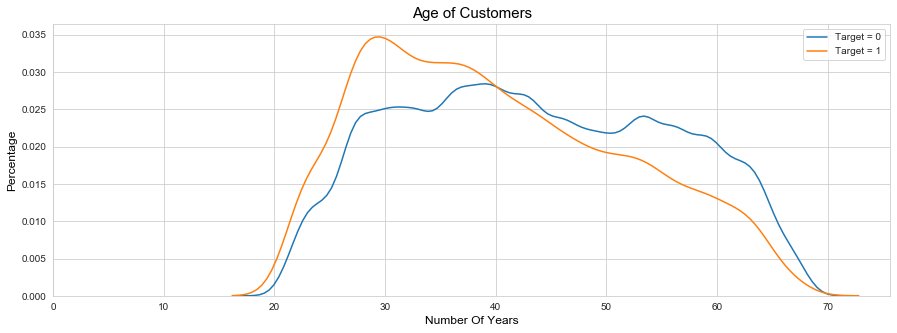

In [61]:
# Univariate analysis of numerical continuous variable, 'YEARS_BIRTH'
# Most customers are aged between 25 and 30 years for target = 0
# Most customers are aged between 35 and 40 years for target = 1

plt.figure(figsize = (15,5))

plt.title('Age of Customers', fontdict = {'fontsize' : 15, 'fontweight' : 5, 'color' : 'Black'})

sns.distplot(data_zero['YEARS_BIRTH'], hist = False, label = 'Target = 0')
sns.distplot(data_one['YEARS_BIRTH'], hist = False, label = 'Target = 1')

plt.xticks(np.arange(0, 80, 10))
plt.xlabel('Number Of Years', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel('Percentage', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show()

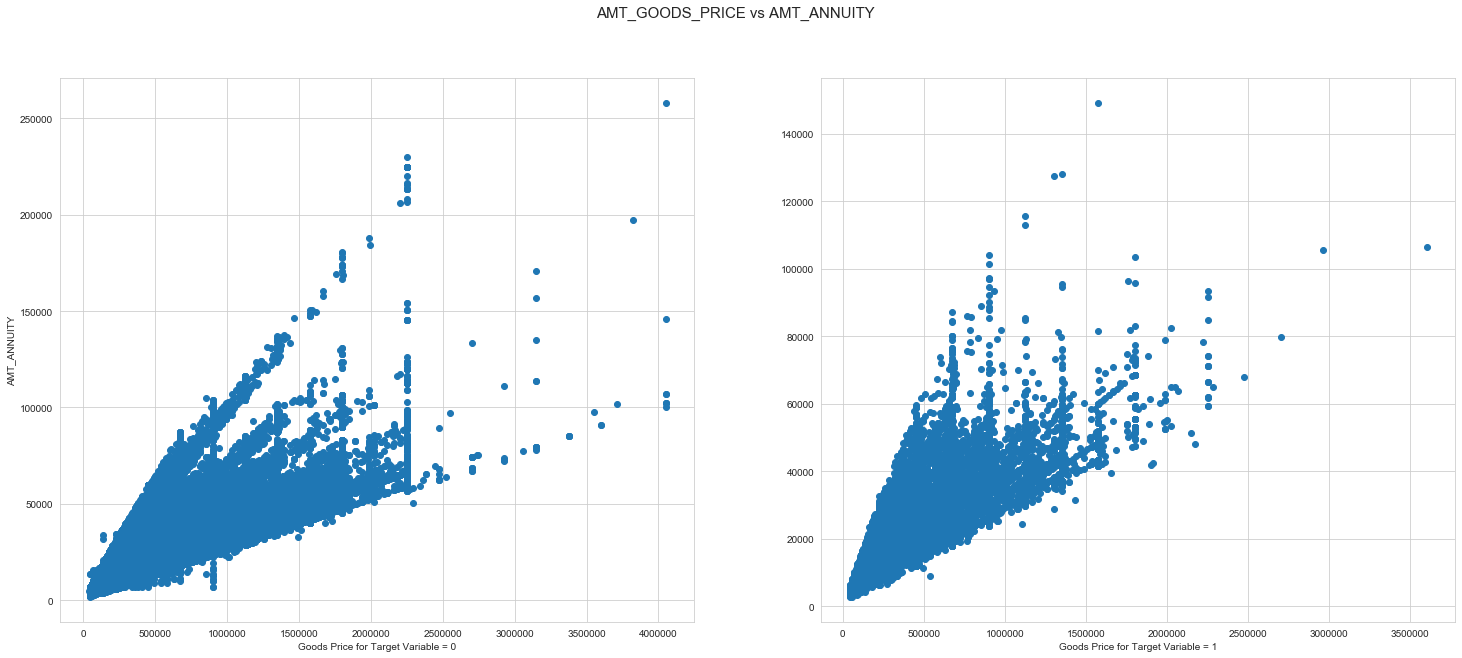

In [62]:
# Bivariate Analysis, AMT_GOODS_PRICE vs AMT_ANNUITY
# As we can see below both the variables have high correlation for both target variables.

plt.figure(figsize = (25,10))

plt.suptitle('AMT_GOODS_PRICE vs AMT_ANNUITY', fontsize = 15, fontweight = 10)

plt.subplot(1,2,1)
plt.scatter(data_zero["AMT_GOODS_PRICE"], data_zero["AMT_ANNUITY"])
plt.xlabel('Goods Price for Target Variable = 0')
plt.ylabel('AMT_ANNUITY')

plt.subplot(1,2,2)
plt.scatter(data_one["AMT_GOODS_PRICE"], data_one["AMT_ANNUITY"])
plt.xlabel('Goods Price for Target Variable = 1')

plt.show()

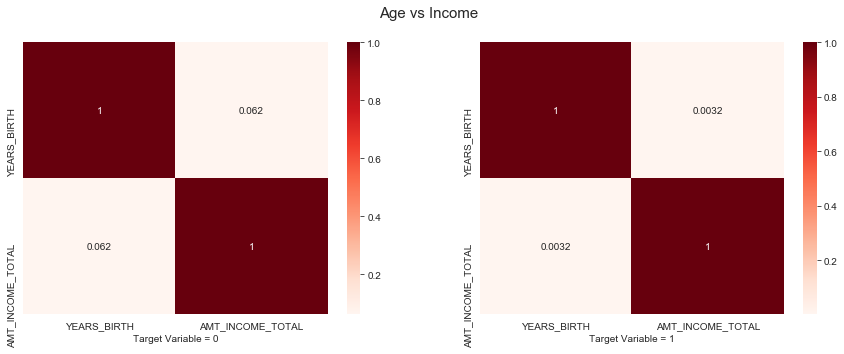

In [63]:
# Bivariate analysis for continuous - continuous variables, 'YEARS_BIRTH' and 'AMT_INCOME_TOTAL'
# As you can below there is very little correlation between the income and age.

plt.figure(figsize = (15,5))

plt.suptitle('Age vs Income', fontsize = 15, fontweight = 10)

plt.subplot(1,2,1)
sns.heatmap(data_zero[['YEARS_BIRTH', 'AMT_INCOME_TOTAL']].corr().abs(), annot = True, cmap = 'Reds')
plt.xlabel('Target Variable = 0')

plt.subplot(1,2,2)
sns.heatmap(data_one[['YEARS_BIRTH', 'AMT_INCOME_TOTAL']].corr().abs(), annot = True, cmap = 'Reds')
plt.xlabel('Target Variable = 1')

plt.show()

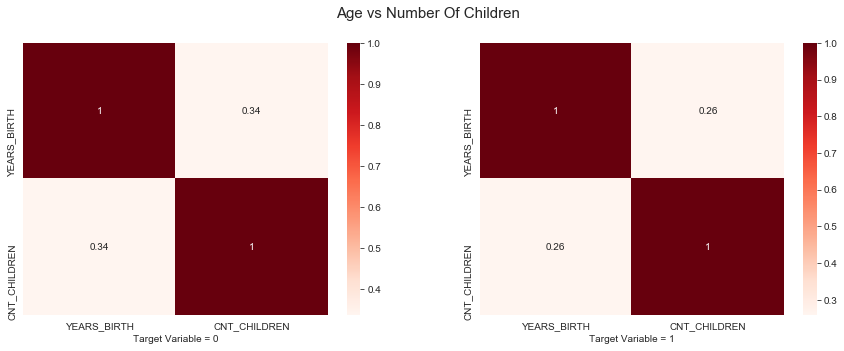

In [64]:
# Bivariate analysis for continuous - continuous variables, 'YEARS_BIRTH' and 'CNT_CHILDREN'
# As you can below there is very little correlation between the number of children and age.

plt.figure(figsize = (15,5))

plt.suptitle('Age vs Number Of Children', fontsize = 15, fontweight = 10)

plt.subplot(1,2,1)
sns.heatmap(data_zero[['YEARS_BIRTH', 'CNT_CHILDREN']].corr().abs(), annot = True, cmap = 'Reds')
plt.xlabel('Target Variable = 0')

plt.subplot(1,2,2)
sns.heatmap(data_one[['YEARS_BIRTH', 'CNT_CHILDREN']].corr().abs(), annot = True, cmap = 'Reds')
plt.xlabel('Target Variable = 1')

plt.show()

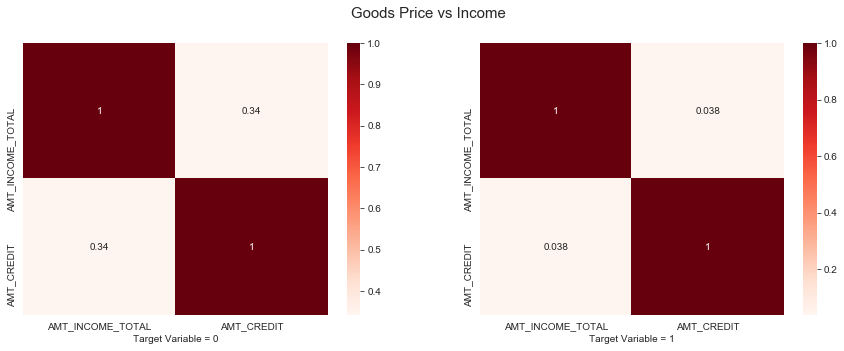

In [65]:
# Bivariate analysis for continuous - continuous variables, 'AMT_GOODS_PRICE' and 'AMT_INCOME_TOTAL'
# The customers that do not default on loans have more disposible income when compared to the defaultors.

plt.figure(figsize = (15,5))

plt.suptitle('Goods Price vs Income', fontsize = 15, fontweight = 10)

plt.subplot(1,2,1)
sns.heatmap(data_zero[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr().abs(), annot = True, cmap = 'Reds')
plt.xlabel('Target Variable = 0')

plt.subplot(1,2,2)
sns.heatmap(data_one[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr().abs(), annot = True, cmap = 'Reds')
plt.xlabel('Target Variable = 1')

plt.show()

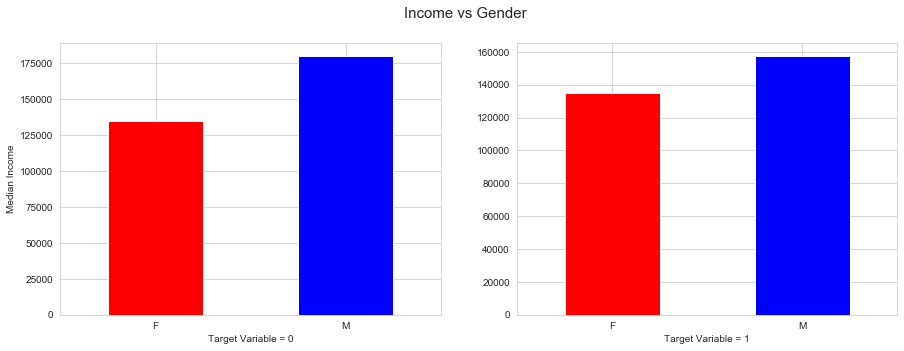

In [66]:
# Bivariate analysis for continuous - categorical variables, 'AMT_INCOME_TOTAL' and 'CODE_GENDER' boxplot
# As seen below the median income for males is higher than females for both the target variables.
# We're using median salary here as the column has a few 

plt.figure(figsize = (15,5))

plt.suptitle('Income vs Gender', fontsize = 15, fontweight = 10)

plt.subplot(121)
data_zero.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].aggregate('median').plot.bar(color = ['Red', 'Blue'])
plt.xlabel('Target Variable = 0')
plt.ylabel('Median Income')
plt.xticks(rotation = 0)

plt.subplot(122)
data_one.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].aggregate('median').plot.bar(color = ['Red', 'Blue'])
plt.xlabel('Target Variable = 1')
plt.xticks(rotation = 0)

plt.show()

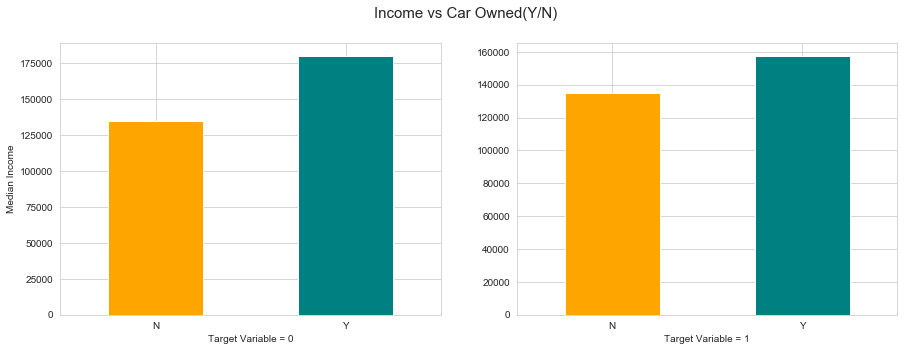

In [67]:
# Bivariate analysis for continuous - categorical variables, 'AMT_INCOME_TOTAL' and 'FLAG_OWN_CAR'
# We can see that only a little more than half of all customers own a car

plt.figure(figsize = (15,5))

plt.suptitle('Income vs Car Owned(Y/N)', fontsize = 15, fontweight = 10)

plt.subplot(121)
data_zero.groupby('FLAG_OWN_CAR')['AMT_INCOME_TOTAL'].aggregate('median').plot.bar(color = ['Orange', 'Teal'])
plt.xlabel('Target Variable = 0')
plt.ylabel('Median Income')
plt.xticks(rotation = 0)

plt.subplot(122)
data_one.groupby('FLAG_OWN_CAR')['AMT_INCOME_TOTAL'].aggregate('median').plot.bar(color = ['Orange', 'Teal'])
plt.xlabel('Target Variable = 1')
plt.xticks(rotation = 0)

plt.show()

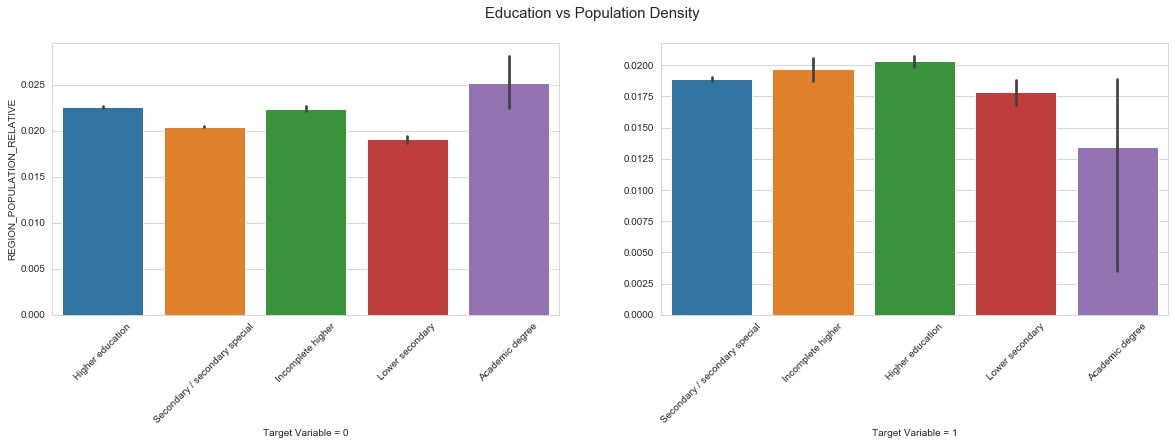

In [68]:
# Bivariate analysis for continuous - categorical variables, 'NAME_EDUCATION_TYPE' and 'REGION_POPULATION_RELATIVE'
# Looking specifically at the customers that have an academic degree, we can see that most of these customers are from high population density regions.

plt.figure(figsize = (20,5))

plt.suptitle('Education vs Population Density', fontsize = 15, fontweight = 20)

plt.subplot(121)
sns.barplot(data = data_zero, y = 'REGION_POPULATION_RELATIVE', x = 'NAME_EDUCATION_TYPE')
plt.xticks(rotation = 45)
plt.xlabel('Target Variable = 0')

plt.subplot(122)
sns.barplot(data = data_one, y = 'REGION_POPULATION_RELATIVE', x = 'NAME_EDUCATION_TYPE')
plt.xlabel('Target Variable = 1')
plt.ylabel(None)
plt.xticks(rotation = 45)

plt.show()

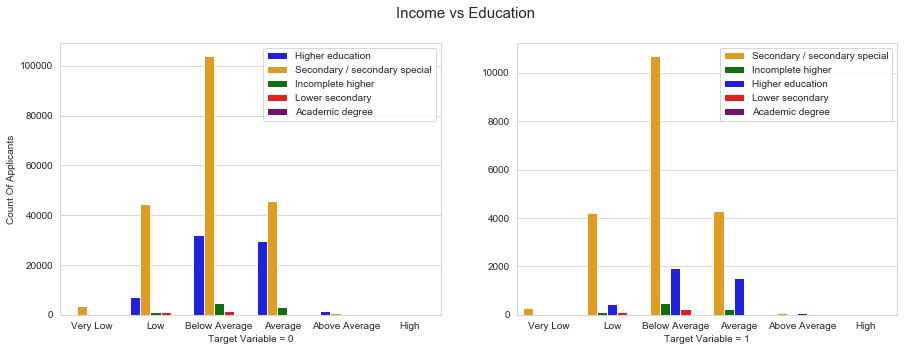

In [69]:
# Bivariate analysis for categorical - categorical variables, 'Income_Category' and 'NAME_EDUCATION_TYPE'
# As seen those with higher education earn a better income, defaultors have mostly only done secondary education.

plt.figure(figsize = (15,5))

plt.suptitle('Income vs Education', fontsize = 15, fontweight = 20)

plt.subplot(121)
sns.countplot(x = 'Income_Category', hue = 'NAME_EDUCATION_TYPE', data = data_zero, palette = {"Higher education" : "blue", "Secondary / secondary special" : "orange", "Incomplete higher" : "green",  "Lower secondary" : "red",  "Academic degree" : "purple"})
plt.xlabel('Target Variable = 0')
plt.legend(loc = 'upper right')
plt.ylabel('Count Of Applicants')

plt.subplot(122)
sns.countplot(x = 'Income_Category', hue = 'NAME_EDUCATION_TYPE', data = data_one, palette = {"Higher education" : "blue", "Secondary / secondary special" : "orange", "Incomplete higher" : "green",  "Lower secondary" : "red",  "Academic degree" : "purple"})
plt.xlabel('Target Variable = 1')
plt.legend(loc = 'upper right')
plt.ylabel(None)

plt.show()

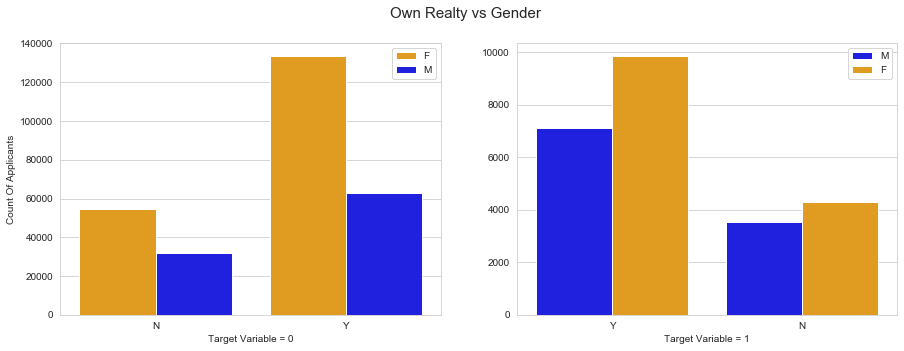

In [70]:
# Bivariate analysis for categorical - categorical variables, 'FLAG_OWN_REALTY' and 'CODE_GENDER'
# In non-defaultors, females own a large percentage of realty, whereas in defaultors, they own slightly more realty than men.

plt.figure(figsize = (15,5))

plt.suptitle('Own Realty vs Gender', fontsize = 15, fontweight = 20)

plt.subplot(121)
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'CODE_GENDER', data = data_zero, palette = {"M" : "blue", "F" : "orange"})
plt.xlabel('Target Variable = 0')
plt.legend(loc = 'upper right')
plt.ylabel('Count Of Applicants')

plt.subplot(122)
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'CODE_GENDER', data = data_one, palette = {"M" : "blue", "F" : "orange"})
plt.xlabel('Target Variable = 1')
plt.legend(loc = 'upper right')
plt.ylabel(None)

plt.show()

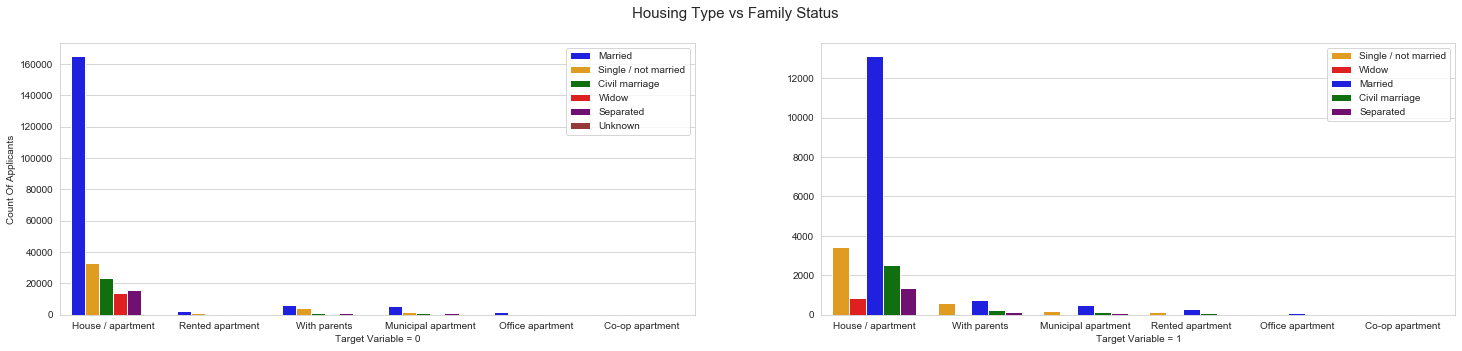

In [71]:
# Bivariate analysis for categorical - categorical variables, 'NAME_HOUSING_TYPE' and 'NAME_FAMILY_STATUS'
# Apartments are the preferred type of housing, especially for the married applicants

plt.figure(figsize = (25,5))

plt.suptitle('Housing Type vs Family Status', fontsize = 15, fontweight = 20)

plt.subplot(121)
sns.countplot(x = 'NAME_HOUSING_TYPE', hue = 'NAME_FAMILY_STATUS', data = data_zero, palette = {"Married" : "blue", "Single / not married" : "orange", "Civil marriage" : "green",  "Widow" : "red",  "Separated" : "purple", "Unknown" : "brown"})
plt.xlabel('Target Variable = 0')
plt.legend(loc = 'upper right')
plt.ylabel('Count Of Applicants')

plt.subplot(122)
sns.countplot(x = 'NAME_HOUSING_TYPE', hue = 'NAME_FAMILY_STATUS', data = data_one, palette = {"Married" : "blue", "Single / not married" : "orange", "Civil marriage" : "green",  "Widow" : "red",  "Separated" : "purple", "Unknown" : "brown"})
plt.xlabel('Target Variable = 1')
plt.legend(loc = 'upper right')
plt.ylabel(None)

plt.show()

### - Application_data + Previous_Application data Merge

In [72]:
prev_data = pd.read_csv('previous_application.csv')

In [73]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [75]:
# Listing the null values columns having more than 30%

emptycol1 = prev_data.isnull().sum()

emptycol1 = emptycol1[emptycol1.values>(0.3*len(emptycol1))]

print(emptycol1)

AMT_ANNUITY                   372235
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64


In [76]:
# Removing columns having more than 30% null values

emptycol1 = list(emptycol1[emptycol1.values >= 0.3].index)

prev_data.drop(labels = emptycol1, axis=1, inplace=True)

prev_data.shape

(1670214, 22)

In [77]:
prev_data.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE',
       'AMT_APPLICATION', 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'],
      dtype=object)

In [78]:
prev_data.drop(['SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'], axis=1,inplace=True)

In [79]:
prev_data.head()

,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_GOODS_CATEGORY,NAME_PORTFOLIO
0,271877,17145.0,17145.0,XAP,Approved,Mobile,POS
1,108129,607500.0,679671.0,XNA,Approved,XNA,Cash
2,122040,112500.0,136444.5,XNA,Approved,XNA,Cash
3,176158,450000.0,470790.0,XNA,Approved,XNA,Cash
4,202054,337500.0,404055.0,Repairs,Refused,XNA,Cash


In [80]:
prev_data.shape

(1670214, 7)

In [81]:
# Merging Application dataset with Previous Application Data 

merged_data = pd.merge(left = app_data, right = prev_data, how = 'inner', on = 'SK_ID_CURR', suffixes = '_x')

In [82]:
merged_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,Income_Category,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,Population_Density,YEARS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_APPLICATION,AMT_CREDITx,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_GOODS_CATEGORY,NAME_PORTFOLIO
0,100002,Cash loans,1,M,N,Y,0,202500.0,Average,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,Very Low Density,25,-637,Laborers,Business Entity Type 3,1.0,179055.0,179055.0,XAP,Approved,Vehicles,POS
1,100003,Cash loans,0,F,N,N,0,270000.0,Average,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,Very Low Density,45,-1188,Core staff,School,0.0,900000.0,1035882.0,XNA,Approved,XNA,Cash
2,100003,Cash loans,0,F,N,N,0,270000.0,Average,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,Very Low Density,45,-1188,Core staff,School,0.0,337500.0,348637.5,XAP,Approved,Furniture,POS
3,100003,Cash loans,0,F,N,N,0,270000.0,Average,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,Very Low Density,45,-1188,Core staff,School,0.0,68809.5,68053.5,XAP,Approved,Consumer Electronics,POS
4,100004,Revolving loans,0,M,Y,Y,0,67500.0,Low,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Very Low Density,52,-225,Laborers,Government,0.0,24282.0,20106.0,XAP,Approved,Mobile,POS


In [83]:
merged_data.shape

(1413701, 29)

In [84]:
merged_data['NAME_CASH_LOAN_PURPOSE'] = merged_data['NAME_CASH_LOAN_PURPOSE'].replace('XNA', np.nan)

In [85]:
merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 786937
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                                   45
Money for a third person                23
Refusal to 

In [86]:
merged_data['NAME_GOODS_CATEGORY'] = merged_data['NAME_GOODS_CATEGORY'].replace('XNA', np.nan)

In [87]:
merged_data['NAME_GOODS_CATEGORY'].value_counts()

Mobile                      193743
Consumer Electronics        104785
Computers                    89923
Audio/Video                  85502
Furniture                    45439
Photo / Cinema Equipment     21707
Construction Materials       21356
Clothing and Accessories     19590
Auto Accessories              6228
Jewelry                       5188
Homewares                     4309
Medical Supplies              3240
Vehicles                      2854
Sport and Leisure             2540
Other                         2337
Gardening                     2322
Office Appliances             1985
Tourism                       1324
Medicine                      1302
Direct Sales                   330
Fitness                        166
Additional Service             109
Education                       89
Weapon                          65
Insurance                       58
Animals                          1
Name: NAME_GOODS_CATEGORY, dtype: int64

### - Data Analysis

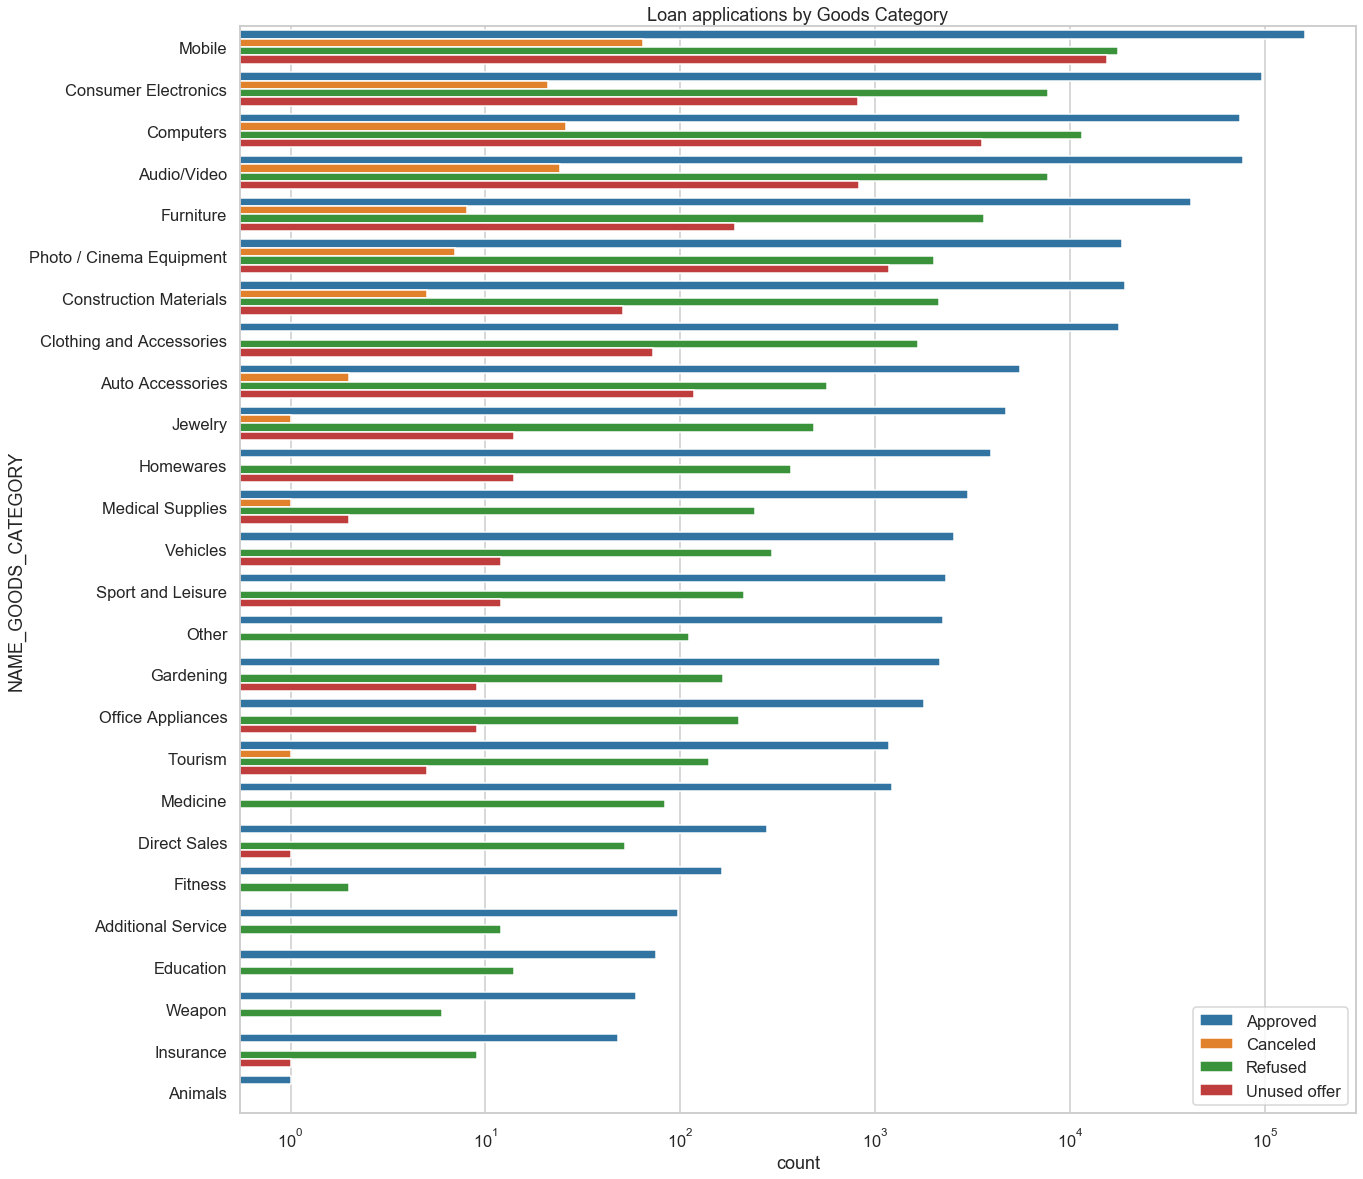

In [88]:
# Univariate analysis, Plotting for Goods Category
# Loan applications for purchasing mobiles and consumer electronics was the highest, with the majority application getting approved

plt.figure(figsize=(20,20))

sns.set_style('whitegrid')
sns.set_context('talk')

sns.countplot(data = merged_data, y= 'NAME_GOODS_CATEGORY', order = merged_data['NAME_GOODS_CATEGORY'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.xticks(rotation=0)
plt.xscale('log')
plt.title('Loan applications by Goods Category')
plt.legend(loc = 'lower right')

plt.show()

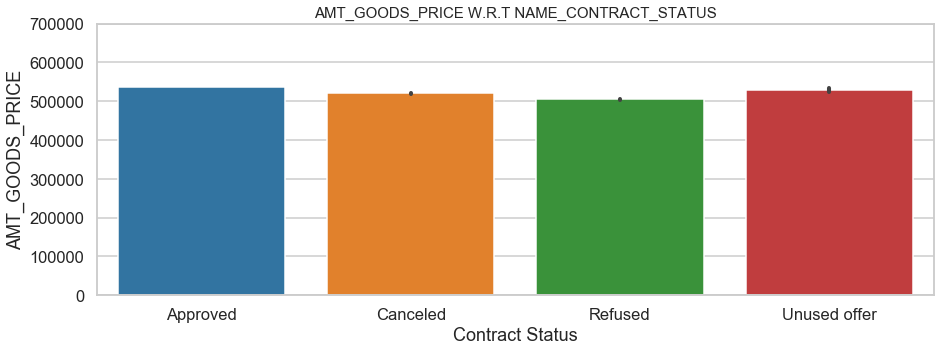

In [89]:
# Univariate Analysis, Plotting for AMT_GOODS_PRICE
# As seen below there is very little impact on the contract status when we take goods price into account.

plt.figure(figsize=(15,5))

plt.title('AMT_GOODS_PRICE W.R.T NAME_CONTRACT_STATUS', fontsize = 15, fontweight = 20)

sns.barplot(data = merged_data, y = 'AMT_GOODS_PRICE', x = 'NAME_CONTRACT_STATUS')
plt.xticks(rotation = 0)
plt.xlabel('Contract Status')
plt.yticks(np.arange(0, 800000,100000))

plt.show()

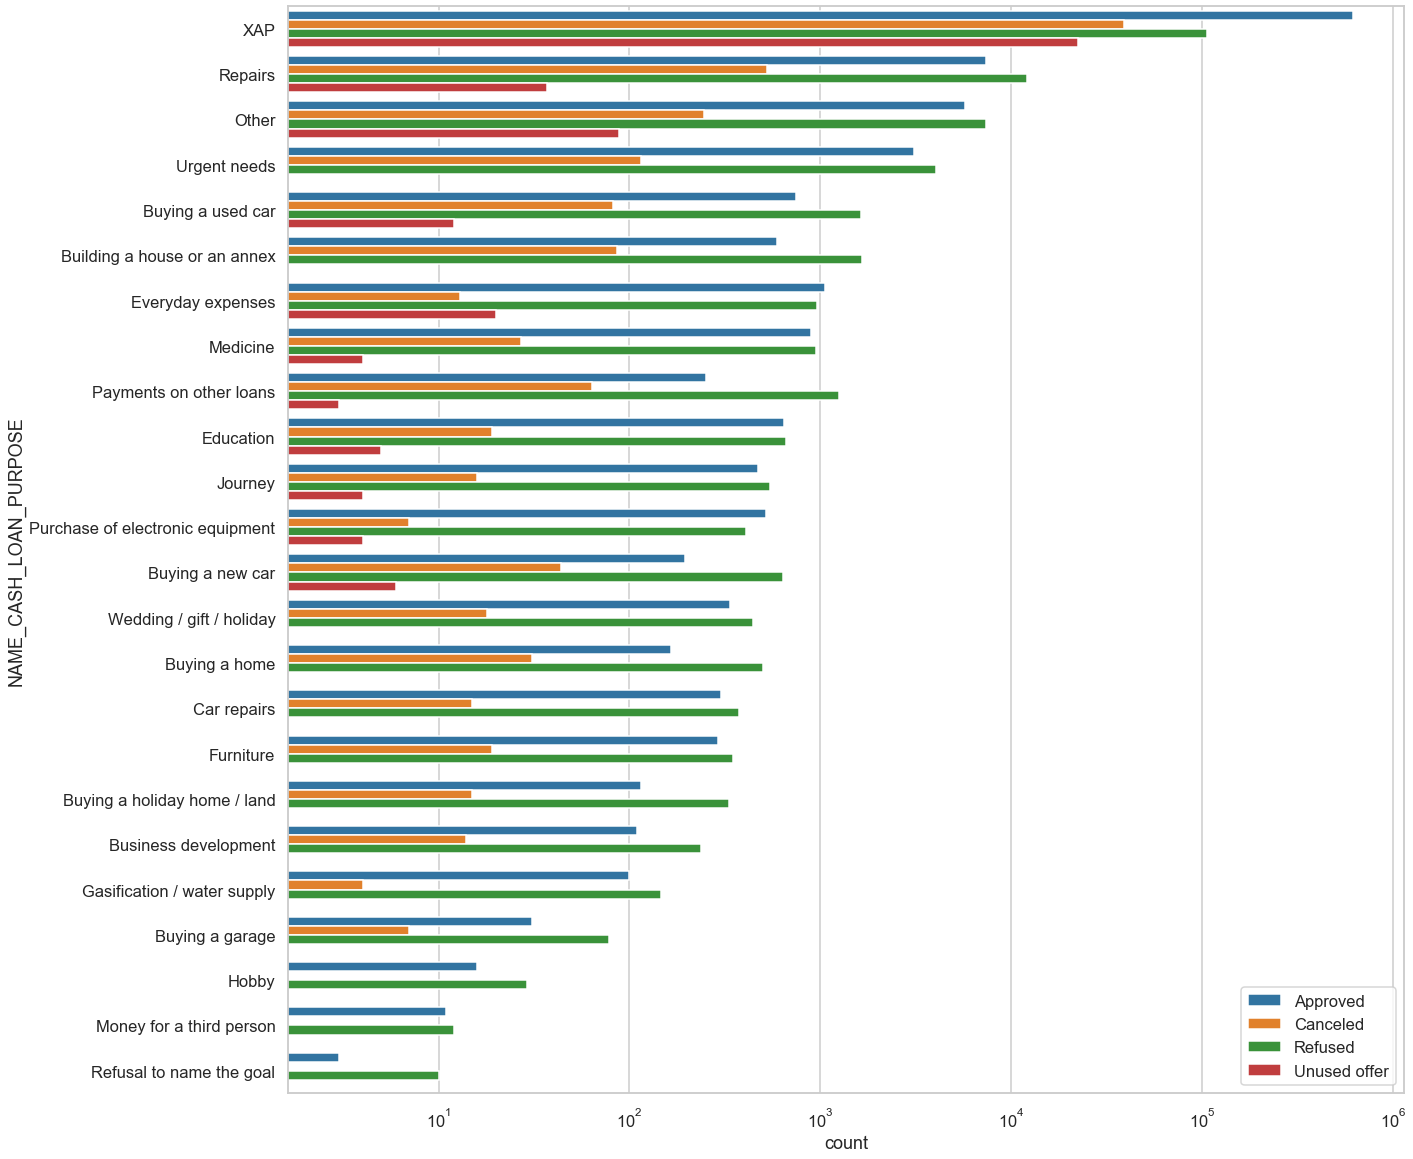

In [90]:
# Univariate analysis, Plotting for Cash Loan Purpose
# Repairs were mentioned as the number one cause for loan application.

plt.figure(figsize=(20,20))

sns.set_style('whitegrid')
sns.set_context('talk')

sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', order = merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.xticks(rotation=0)
plt.xscale('log')
plt.title('')
plt.legend(loc = 'lower right')

plt.show()

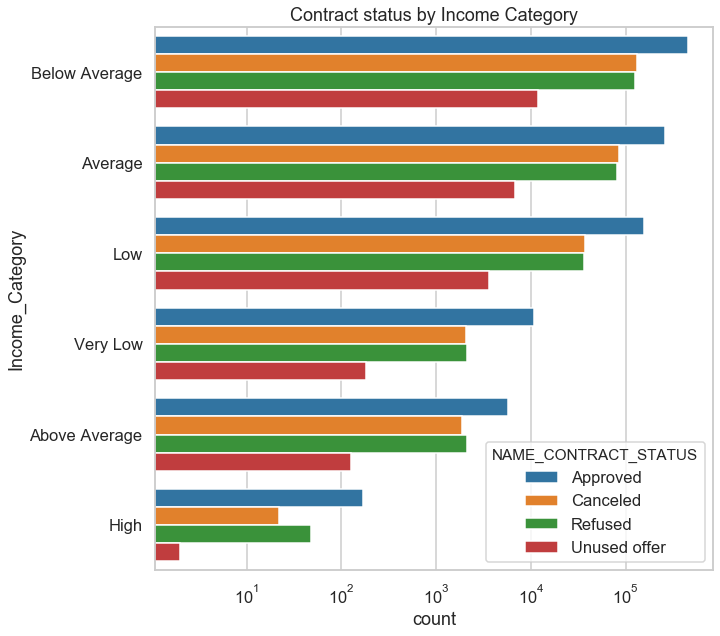

In [91]:
# Univariate analysis, Plotting for Income Type
# Those with below average income have the most number of loan applications

plt.figure(figsize=(10,10))

sns.set_style('whitegrid')

sns.countplot(data = merged_data, y= 'Income_Category', order=merged_data['Income_Category'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')

sns.set_context('talk')
plt.xticks(rotation=0)
plt.xscale('log')
plt.title('Contract status by Income Category')

plt.show()

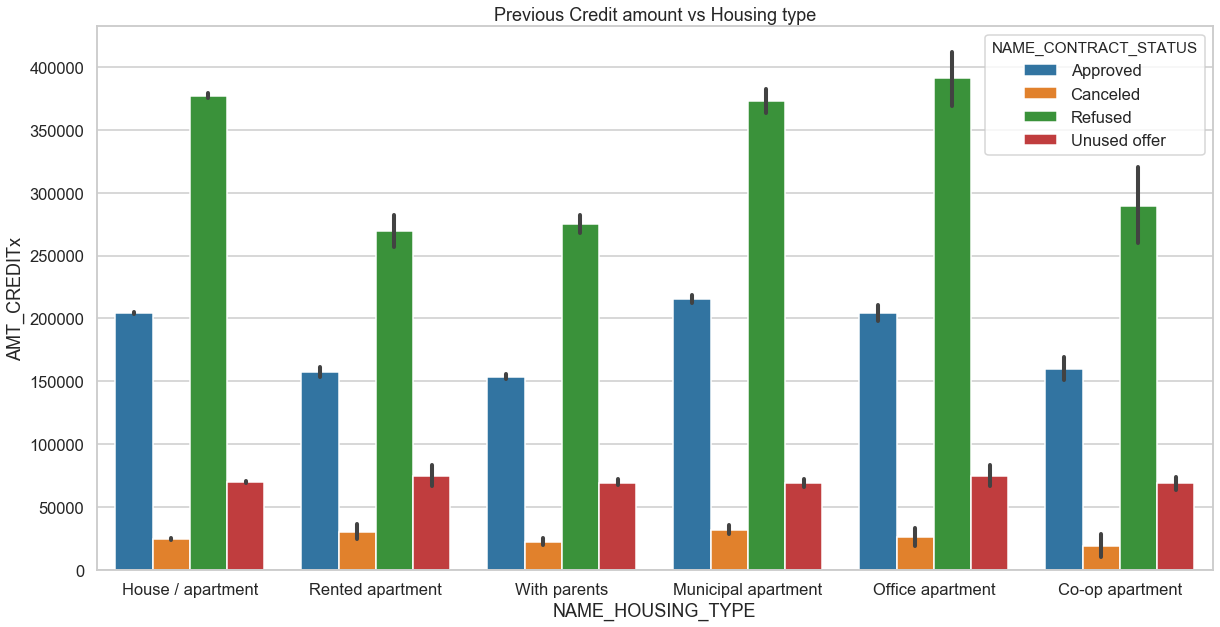

In [92]:
# Barplot for Previous Credit amount vs Housing type
# Applicants with office apartments and high previous credit amount were mostly refused compared to those with rented apartments and low credit amount

plt.figure(figsize=(20,10))

sns.barplot(data= merged_data, y='AMT_CREDITx',hue='NAME_CONTRACT_STATUS',x='NAME_HOUSING_TYPE')
plt.xticks(rotation=0)
plt.title('Previous Credit amount vs Housing type')

plt.show()

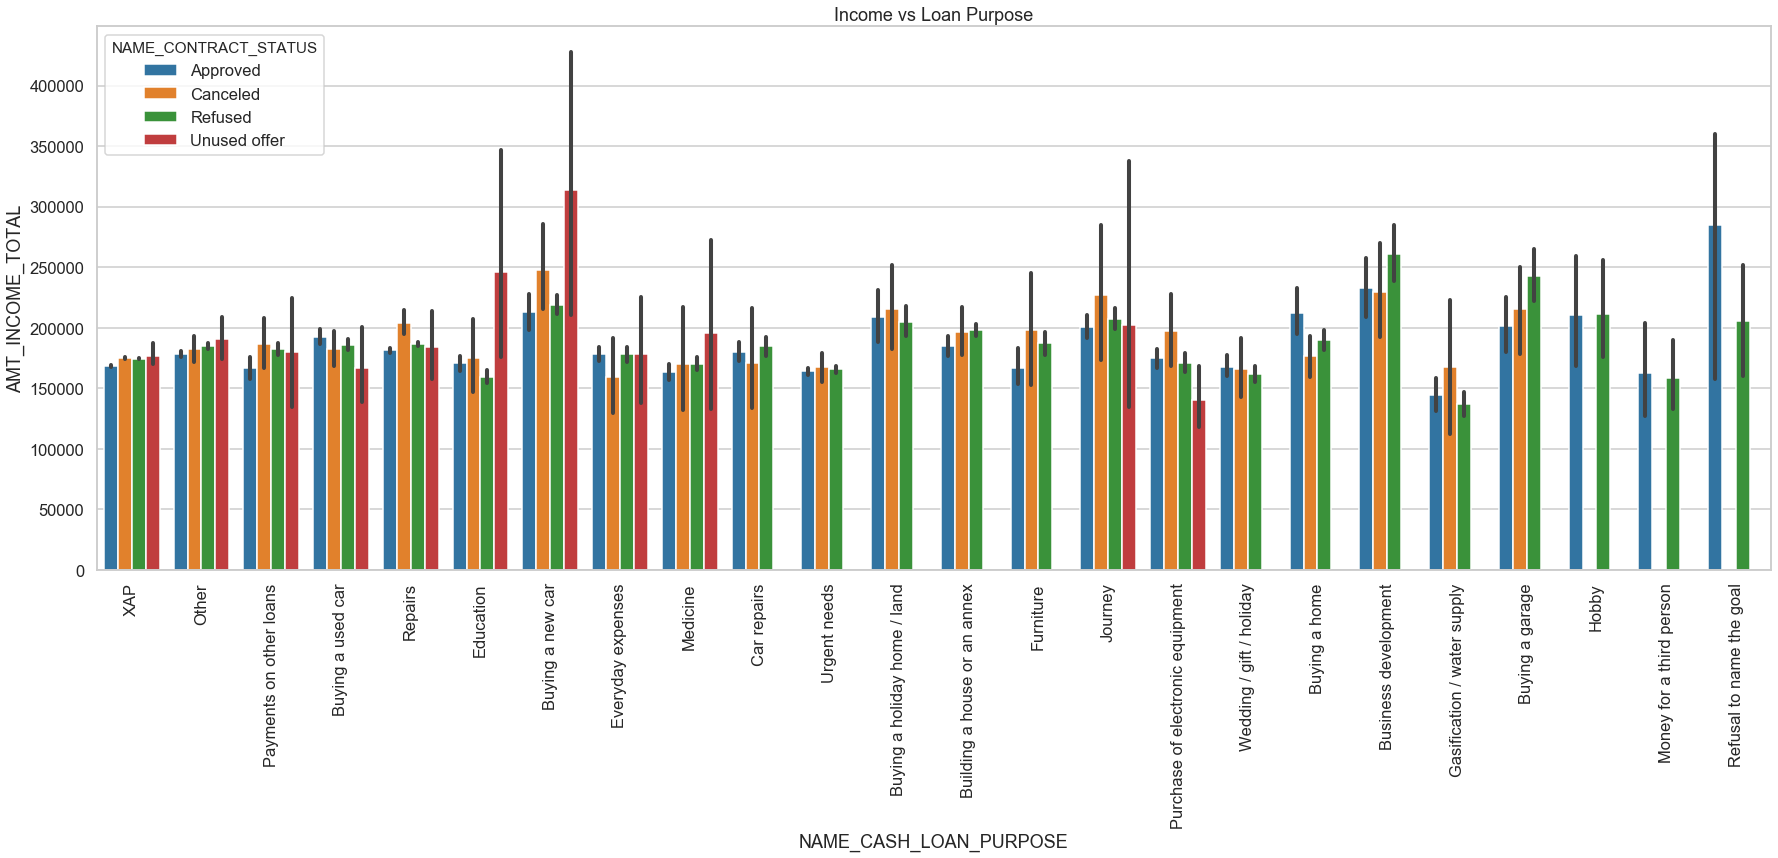

In [93]:
# Barplot for Previous Credit amount vs Housing type
# Education and car loan offers were the most unused

plt.figure(figsize=(30,10))

sns.barplot(data= merged_data, y='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_STATUS',x='NAME_CASH_LOAN_PURPOSE')
plt.xticks(rotation=90)
plt.title('Income vs Loan Purpose')

plt.show()

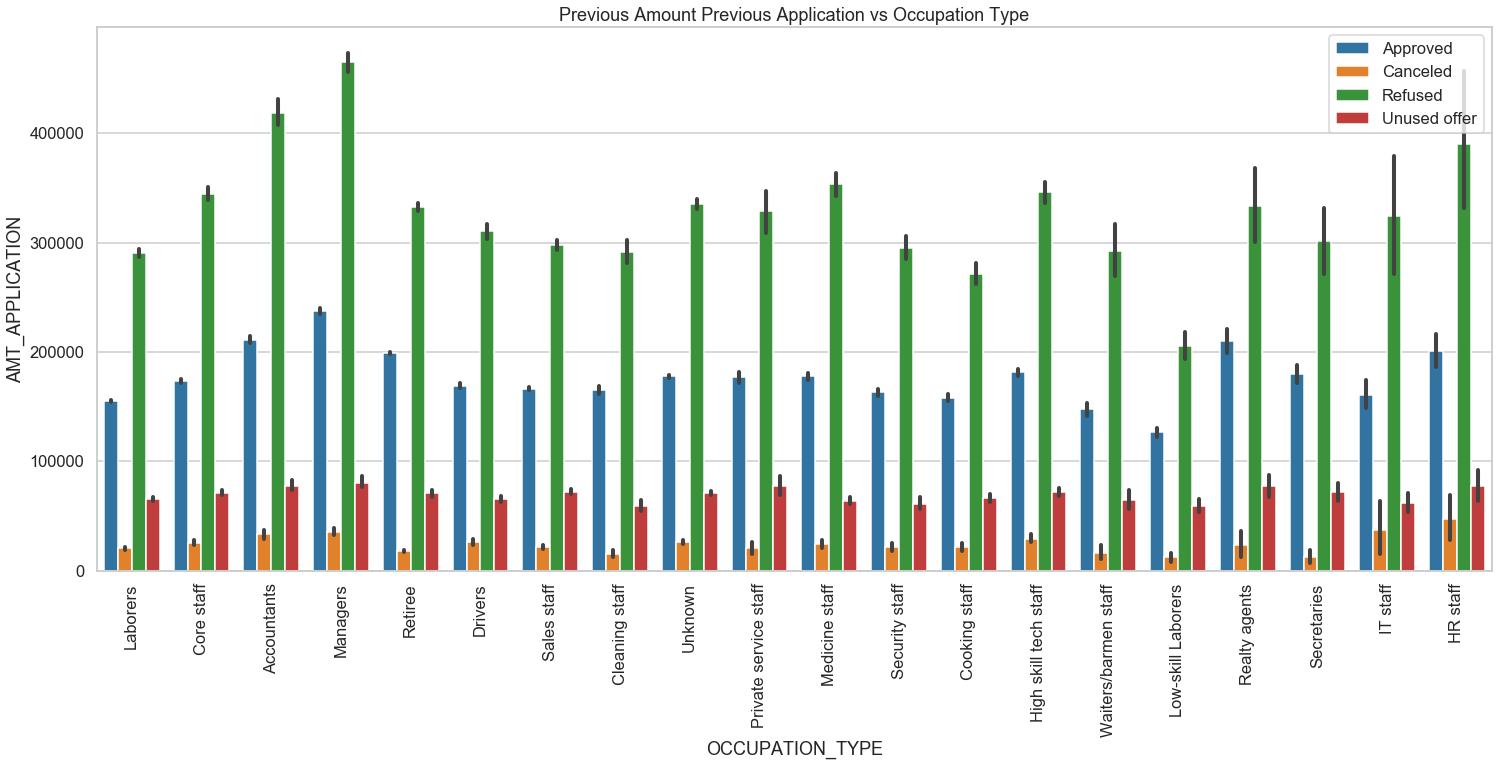

In [94]:
# Barplot for Previous Amount Previous Application vs Occupation Type
# Managers had the most number of refused applications based on the amount of the previous application

plt.figure(figsize=(25,10))

sns.barplot(data= merged_data, y='AMT_APPLICATION',hue='NAME_CONTRACT_STATUS',x='OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.title('Previous Amount Previous Application vs Occupation Type')
plt.legend(loc = 'upper right')

plt.show()